In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/sample_data/Phishing_Legitimate_full.csv")
data.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [4]:
data.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [6]:
list(data.columns)

['id',
 'NumDots',
 'SubdomainLevel',
 'PathLevel',
 'UrlLength',
 'NumDash',
 'NumDashInHostname',
 'AtSymbol',
 'TildeSymbol',
 'NumUnderscore',
 'NumPercent',
 'NumQueryComponents',
 'NumAmpersand',
 'NumHash',
 'NumNumericChars',
 'NoHttps',
 'RandomString',
 'IpAddress',
 'DomainInSubdomains',
 'DomainInPaths',
 'HttpsInHostname',
 'HostnameLength',
 'PathLength',
 'QueryLength',
 'DoubleSlashInPath',
 'NumSensitiveWords',
 'EmbeddedBrandName',
 'PctExtHyperlinks',
 'PctExtResourceUrls',
 'ExtFavicon',
 'InsecureForms',
 'RelativeFormAction',
 'ExtFormAction',
 'AbnormalFormAction',
 'PctNullSelfRedirectHyperlinks',
 'FrequentDomainNameMismatch',
 'FakeLinkInStatusBar',
 'RightClickDisabled',
 'PopUpWindow',
 'SubmitInfoToEmail',
 'IframeOrFrame',
 'MissingTitle',
 'ImagesOnlyInForm',
 'SubdomainLevelRT',
 'UrlLengthRT',
 'PctExtResourceUrlsRT',
 'AbnormalExtFormActionR',
 'ExtMetaScriptLinkRT',
 'PctExtNullSelfRedirectHyperlinksRT',
 'CLASS_LABEL']

In [7]:
for col in data.columns:
  unique_val = data[col].unique()
  if len(unique_val)>10:
    print(f'the {col} column has {data[col].nunique()}')
  else:
    print(f'the {col} column has {data[col].nunique()}')

the id column has 10000
the NumDots column has 17
the SubdomainLevel column has 13
the PathLevel column has 18
the UrlLength column has 226
the NumDash column has 25
the NumDashInHostname column has 10
the AtSymbol column has 2
the TildeSymbol column has 2
the NumUnderscore column has 16
the NumPercent column has 14
the NumQueryComponents column has 19
the NumAmpersand column has 16
the NumHash column has 2
the NumNumericChars column has 82
the NoHttps column has 2
the RandomString column has 2
the IpAddress column has 2
the DomainInSubdomains column has 2
the DomainInPaths column has 2
the HttpsInHostname column has 1
the HostnameLength column has 74
the PathLength column has 147
the QueryLength column has 164
the DoubleSlashInPath column has 2
the NumSensitiveWords column has 4
the EmbeddedBrandName column has 2
the PctExtHyperlinks column has 2510
the PctExtResourceUrls column has 1489
the ExtFavicon column has 2
the InsecureForms column has 2
the RelativeFormAction column has 2
the

In [8]:
data = data.drop(columns='id')
data.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,NumPercent,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,3,1,3,144,0,0,0,0,2,0,...,0,0,0,1,-1,1,1,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,3,1,6,79,1,0,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,3,0,4,46,0,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


Kelas 1 : 5000
Kelas 0 : 5000


Text(0.5, 1.0, 'phishing vs non-phishing')

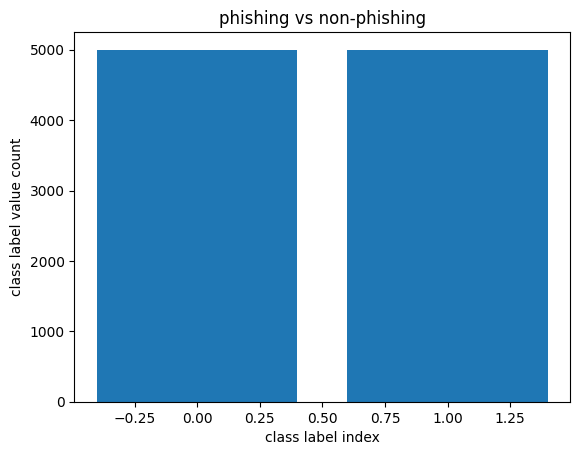

In [9]:
classLabel = data['CLASS_LABEL'].value_counts()

for label, count in classLabel.items():
  print(f'Kelas {label} : {count}')

plt.bar(classLabel.index, classLabel.values)
plt.xlabel('class label index')
plt.ylabel('class label value count')
plt.title('phishing vs non-phishing')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, mean_squared_error

In [11]:
# finding the target label and feature available
target = data['CLASS_LABEL']
features = data.drop(['CLASS_LABEL', 'RelativeFormAction', 'DoubleSlashInPath', 'HttpsInHostname',
                            'DomainInSubdomains', 'FakeLinkInStatusBar', 'RandomString', 'EmbeddedBrandName', 'AtSymbol', 'ImagesOnlyInForm', 'NumHash', 'AbnormalFormAction', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'PopUpWindow', 'RightClickDisabled', 'IpAddress', 'SubdomainLevelRT', 'TildeSymbol'], axis=1)
features.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,NumUnderscore,NumPercent,NumQueryComponents,NumAmpersand,...,InsecureForms,ExtFormAction,PctNullSelfRedirectHyperlinks,FrequentDomainNameMismatch,SubmitInfoToEmail,IframeOrFrame,MissingTitle,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT
0,3,1,5,72,0,0,0,0,0,0,...,1,0,0.0,0,0,0,0,1,-1,1
1,3,1,3,144,0,0,2,0,2,1,...,1,0,0.0,0,0,0,0,1,1,1
2,3,1,2,58,0,0,0,0,0,0,...,1,0,0.0,0,0,0,0,1,-1,0
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0.0,1,1,0,0,1,1,-1
4,3,0,4,46,0,0,0,0,0,0,...,0,1,0.0,1,0,1,0,0,-1,-1


In [12]:
# split the train and test data
# 20% data uji, 80% data training
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [13]:
lg_model = LogisticRegression()
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [14]:
lg_model.fit(X_train, Y_train)
rf_model.fit(X_train, Y_train)
gbm_model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=42)

In [15]:
lg_pred = lg_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gbm_pred = gbm_model.predict(X_test)

In [25]:
lg_accuracy = accuracy_score(Y_test, lg_pred)
rf_accuracy = accuracy_score(Y_test, rf_pred)
gbm_accuracy = accuracy_score(Y_test, gbm_pred)
print("LR Accuracy Score: ", lg_accuracy)
print("RF Accuracy Score: ", rf_accuracy)
print("GBM Accuracy Score:", gbm_accuracy)

LR Accuracy Score:  0.928
RF Accuracy Score:  0.9845
GBM Accuracy Score: 0.982


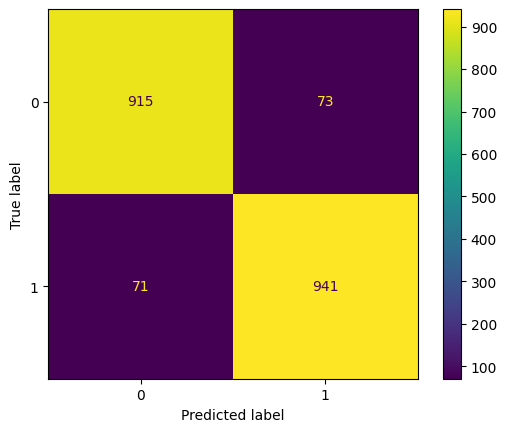

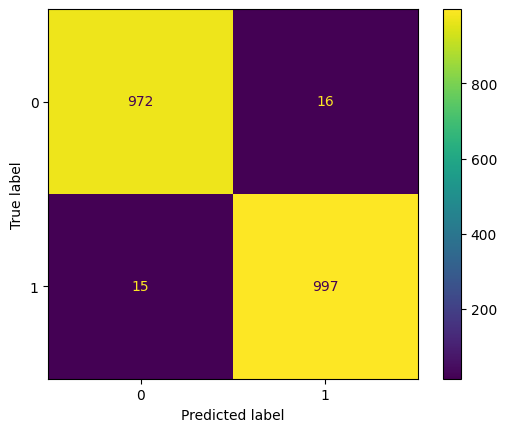

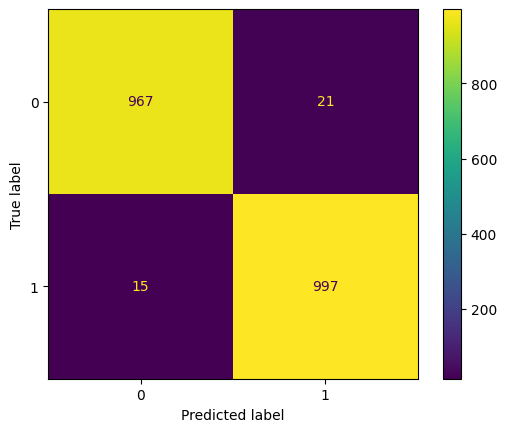

In [26]:
# Confusion Matrix Display
lg_cm = confusion_matrix(Y_test, lg_pred)
rf_cm = confusion_matrix(Y_test, rf_pred)
gbm_cm = confusion_matrix(Y_test, gbm_pred)
disp_lg = ConfusionMatrixDisplay(confusion_matrix=lg_cm, display_labels=lg_model.classes_)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=rf_model.classes_)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=gbm_cm, display_labels=gbm_model.classes_)

disp_lg.plot()
disp_rf.plot()
disp_gbm.plot()

In [27]:
# Classification Report
lg_report = classification_report(Y_test, lg_pred)
rf_report = classification_report(Y_test, rf_pred)
gbm_report = classification_report(Y_test, gbm_pred)

print("Logistic Regression Classification Report:\n", lg_report)
print("Random Forest Classifier Classification Report:\n", rf_report)
print("Gradient Boosting Classifier Classification Report:\n", gbm_report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       988
           1       0.93      0.93      0.93      1012

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.99      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Gradient Boosting Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.99      0.98      1012

    accuracy                        

In [18]:
from sklearn.tree import export_graphviz
import graphviz

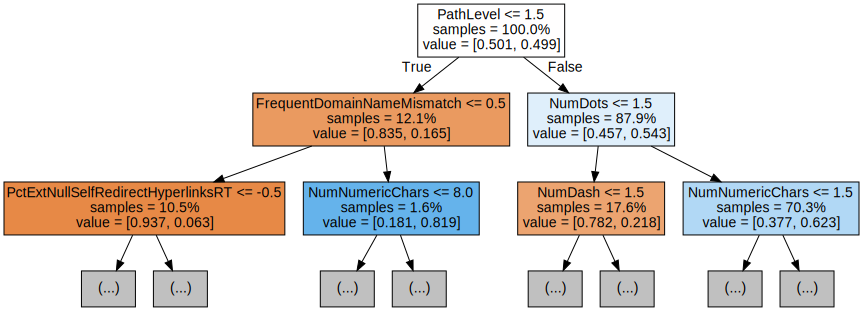

In [20]:
for i in range(3):
  tree = rf_model.estimators_[i]
  dot_data= export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

In [24]:
from sklearn.ensemble import VotingClassifier
model = VotingClassifier(estimators=[('lg', lg_model), ('rf', rf_model), ('gbm', gbm_model)], voting='hard')
model.fit(X_train, Y_train)
cek = model.score(X_test, Y_test)
print("Accuracy: ", cek)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:  0.9825


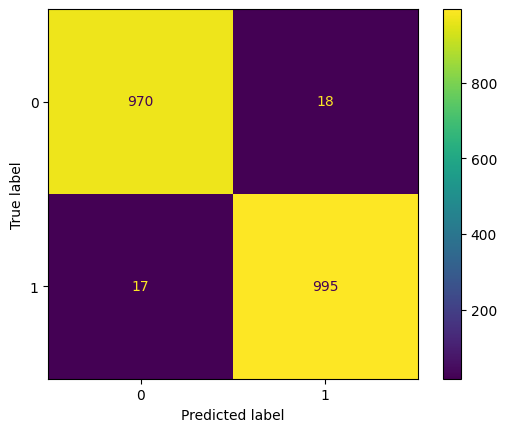

In [29]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [30]:
# Classification Report Voting Classifier
report = classification_report(Y_test, pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

